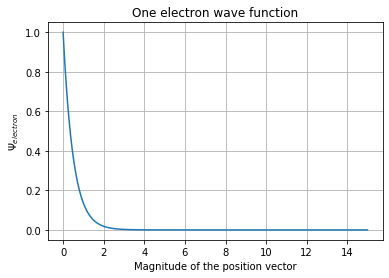

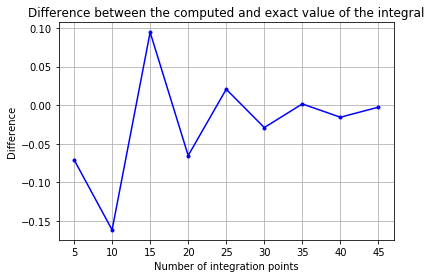

In [11]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

#Here we read the data for the one electron function
fname="Gauss_result/One_electron_function"
f=open(fname, "r")
line=f.readlines()
n=int(line[1])

x=np.zeros(n)
f=np.zeros(n)

#Here we save the data for the one electron function
x, f = np.loadtxt(fname,skiprows=3,unpack=True)
plt.figure()
#Here we plot the one electron function
plt.plot(x,f)
plt.grid(True)
plt.title(r"One electron wave function")
plt.ylabel(r"$\Psi_{electron}$")
plt.xlabel(r"Magnitude of the position vector")
plt.savefig("Gauss_result/Plot.pdf")


file_values = np.array([0,1,2,3,4,5,6,7,8])
n_values = np.zeros(9)
integral = np.zeros(9)
result=0.19276571095877654

for num_file in file_values:
    fname="Gauss_result/leg%d" % num_file
    infile=open(fname, "r")
    lines=infile.readlines()
    n_values[num_file]=int(lines[2])
    integral[num_file]=float(lines[6])
    
plt.figure()
plt.plot(n_values,integral-result, "b")
plt.grid(True)
plt.plot(n_values,integral-result, "b.", label='badint')
plt.title(r"Difference between the computed and exact value of the integral")
plt.ylabel(r"Difference")
plt.xlabel(r"Number of integration points")
plt.savefig("Gauss_result/Comparation.pdf")

